<a href="https://colab.research.google.com/github/naveen-ramavath/machine-learning/blob/main/ml_assaignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning Assignment - I
1. Regression CO1,2 B4
For this exercise, you will experiment with regression, regularization, and cross-validation. Choose

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score

In [2]:
df = pd.read_csv("diabetes2.csv")
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X.shape
pd.set_option('future.no_silent_downcasting', True)


basic operations

In [3]:
X.isnull().sum()

X.dropna(axis=1, thresh=0.5 * len(X), inplace=True)

numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

X[numerical_cols] = X[numerical_cols].fillna(X[numerical_cols].median())
for col in categorical_cols:
    X[col] = X[col].fillna(X[col].mode()[0])

cat_cols = X.select_dtypes(include=['object', 'category']).columns
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)
X = X_encoded.copy()
X.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


(b) Split the data at random into one set (Xtrain, ytrain) containing 80% of the instances, which willbe used for training + validation, and a testing set Xtest, ytest) (containing remaining instances).

In [4]:
standScale = StandardScaler()
X_scaled = standScale.fit_transform(X)
X = X_scaled.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)


Objective of Logistic Regression with L2 Regularization

Logistic Regression with L2 Regularization
Logistic regression is a classification algorithm that predicts the probability of a binary outcome (Outcome ∈ {0,1}) given input features (X).

It models the probability using the sigmoid function.

Logistic regression can overfit when there are:

Many features

Highly correlated features

Small datasets

Overfitting leads to large weights that fit the training data well but perform poorly on unseen data.

L2 regularization adds a penalty term proportional to the square of the weight magnitudes.

λ = regularization parameter controlling penalty strength

The model now minimizes both the logistic loss and the magnitude of weights.

Helps in reducing overfitting and improving generalization.

Objective: Minimize the regularized loss to fit data while keeping weights small, reducing overfitting.

(d) Logistic Regression with L2 Regularization on Diabetes Dataset

We run logistic regression on the Diabetes dataset using L2 regularization, varying the regularization parameter
λ ∈ {0, 0.1, 1, 10, 100, 1000}.

Plot 1: Average cross-entropy for the training data and testing data (as a function of λ, log scale).

Plot 2: L2 norm of the weight vector.

Plot 3: Actual values of the weights obtained (one curve per weight).

Plot 4: Accuracy on the training and testing set.

Regularization Parameter (λ):
As λ increases, the regularization becomes stronger — meaning the model penalizes large weights more heavily to avoid overfitting.

Logistic Regression and Regularization:
In logistic regression, regularization is controlled via the penalty parameter.

"l2" → L2 Regularization (Ridge)

"l1" → L1 Regularization (Lasso)

The regularization strength is set using the C parameter, where C = 1/λ.
A smaller C means stronger regularization.

Arrays collected from each model:

train_losses: Cross-entropy loss on the training data

test_losses: Cross-entropy loss on the testing data

train_accuracy: Accuracy on training data

test_accuracy: Accuracy on testing data

l2_norms: L2 norm of the model weight vector

weights: Model coefficient vectors

In [5]:
from sklearn.metrics import log_loss

lambdas = [0, 0.1, 1, 10, 100, 1000]

train_losses, test_losses = [], []
l2_norms, weights = [], []
train_accuracy, test_accuracy = [], []

for val in lambdas:
    C = 10**12 if val == 0 else 1 / val
    model = LogisticRegression(penalty='l2', C=C, solver='liblinear', max_iter=1000)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_train_prob = model.predict_proba(X_train)
    y_test_prob = model.predict_proba(X_test)

    train_losses.append(log_loss(y_train, y_train_prob))
    test_losses.append(log_loss(y_test, y_test_prob))
    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))
    l2_norms.append(np.linalg.norm(model.coef_))
    weights.append(model.coef_.flatten())

weights = np.array(weights)


1. Cross-Entropy Loss vs λ (Regularization Parameter)
Training Loss increases steadily as λ increases.
Test Loss is lowest at λ ≈ 0.1 or 1, then rises sharply for larger λ.
Interpretation:

Small λ values allow the model to capture patterns while avoiding overfitting.
Large λ values over-penalize the model, leading to underfitting, which hurts both train and test performance.
Reflects the classic bias-variance trade-off controlled by regularization strength

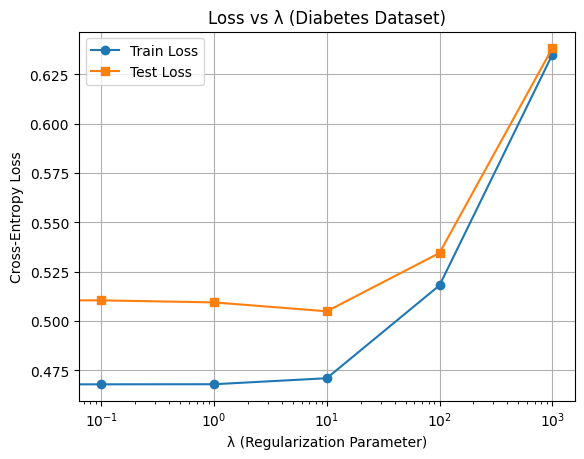

In [6]:
plt.figure()
plt.plot(lambdas, train_losses, marker='o', label='Train Loss')
plt.plot(lambdas, test_losses, marker='s', label='Test Loss')
plt.xscale('log')
plt.xlabel('λ (Regularization Parameter)')
plt.ylabel('Cross-Entropy Loss')
plt.title('Loss vs λ (Diabetes Dataset)')
plt.grid(True)
plt.legend()
plt.show()


 L2 Norm vs λ (Regularization Parameter)
L2 norm of the weight vector decreases monotonically as λ increases.
Interpretation:

Larger λ values impose stronger penalties on weight magnitudes.
As a result, the model complexity is reduced by shrinking weights toward zero.
Confirms the expected behavior of L2 regularization.

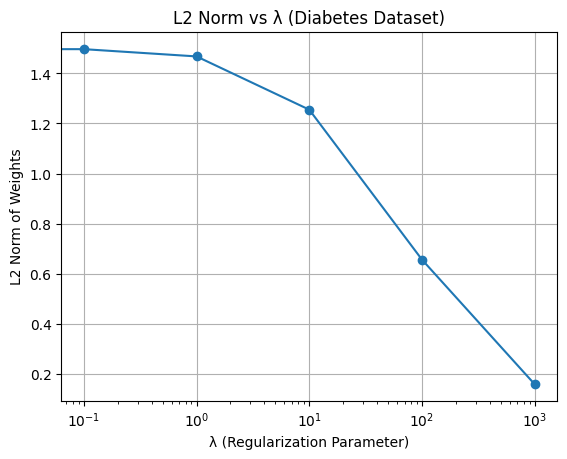

In [7]:
plt.figure()
plt.plot(lambdas, l2_norms, marker='o')
plt.xscale('log')
plt.xlabel('λ (Regularization Parameter)')
plt.ylabel('L2 Norm of Weights')
plt.title('L2 Norm vs λ (Diabetes Dataset)')
plt.grid(True)
plt.show()


Weight Coefficients vs λ
At small λ, weights show larger variance and stronger influence.
As λ increases, all weight coefficients converge toward zero.
Interpretation:

For small λ, the model is more flexible and responsive to individual features.
For large λ, the model is overly constrained and fails to capture meaningful patterns.
Demonstrates regularization’s role in smoothing and simplifying the learned model.

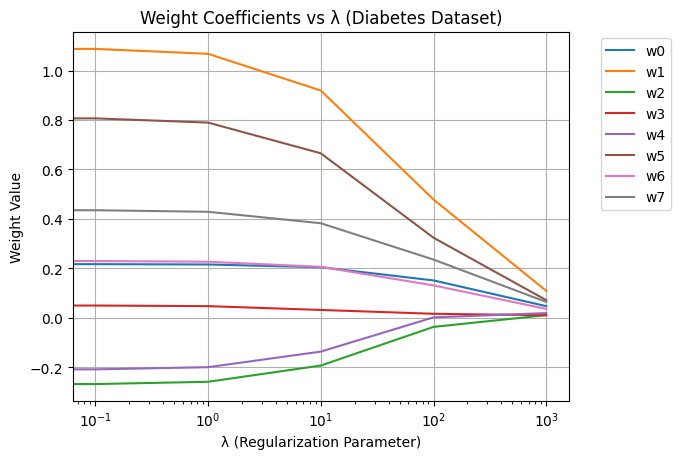

In [8]:
plt.figure()
for i in range(weights.shape[1]):
    plt.plot(lambdas, weights[:, i], label=f'w{i}')
plt.xscale('log')
plt.xlabel('λ (Regularization Parameter)')
plt.ylabel('Weight Value')
plt.title('Weight Coefficients vs λ (Diabetes Dataset)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()



Accuracy vs λ

Training Accuracy: Decreases gradually as λ increases.
Test Accuracy: Remains stable or shows slight improvement for moderate values of λ.

Interpretation:

Stronger regularization (higher λ) penalizes large weights, which reduces training accuracy.

However, this penalty prevents overfitting and improves the model’s ability to generalize.

In the Diabetes dataset, test accuracy shows slight gains for λ values in the range of about 10–100, indicating better generalization.

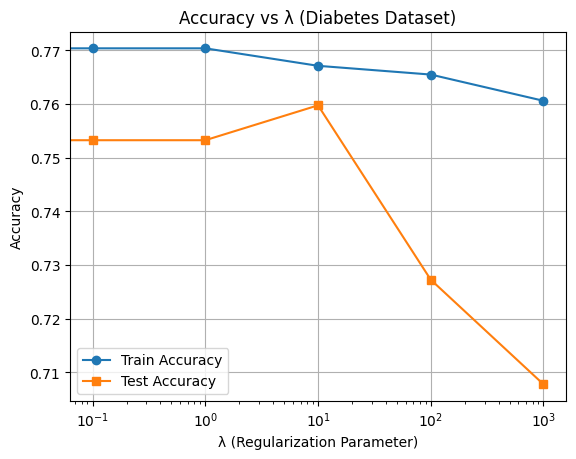

In [9]:
plt.figure()
plt.plot(lambdas, train_accuracy, marker='o', label='Train Accuracy')
plt.plot(lambdas, test_accuracy, marker='s', label='Test Accuracy')
plt.xscale('log')
plt.xlabel('λ (Regularization Parameter)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs λ (Diabetes Dataset)')
plt.grid(True)
plt.legend()
plt.show()


Gaussian Basis Function Transformation

Each input variable from the Diabetes dataset is re-mapped into a new feature space using Gaussian basis functions

In [10]:
import numpy as np

def generate_gaussian_basis(X, means, sigma):
    n_samples, n_features = X.shape
    transformed_features = []

    for feature_idx in range(n_features):
        feature_column = X[:, feature_idx].reshape(-1, 1)
        basis_outputs = [
            np.exp(- (feature_column - mu)**2 / (2 * sigma**2))
            for mu in means
        ]
        transformed_features.append(np.hstack(basis_outputs))

    return np.hstack(transformed_features)


In [11]:
means = np.linspace(-10, 10, 5)
sigma_values = [0.1, 0.5, 1, 5, 10]
gaussian_transformed_data = {}

for sigma in sigma_values:
    X_train_transformed = generate_gaussian_basis(X_train, means, sigma)
    X_test_transformed = generate_gaussian_basis(X_test, means, sigma)

    gaussian_transformed_data[sigma] = {
        'X_train': X_train_transformed,
        'X_test': X_test_transformed
    }
    print(f"[INFO] Transformed X_train shape for σ={sigma}: {X_train_transformed.shape}")


[INFO] Transformed X_train shape for σ=0.1: (614, 40)
[INFO] Transformed X_train shape for σ=0.5: (614, 40)
[INFO] Transformed X_train shape for σ=1: (614, 40)
[INFO] Transformed X_train shape for σ=5: (614, 40)
[INFO] Transformed X_train shape for σ=10: (614, 40)


After applying 5 Gaussian functions per feature:
Each feature → transformed into 5 new features

Total features: 8 × 5 = 40

So, your transformed datasets have:

X_train.shape = (614, 40)
X_test.shape = (154, 40) # assuming an 80-20 train-test split

Each row is now a high-dimensional representation of the original input — where each feature is represented by how "close" it is to the various Gaussian means.

Using no regularization and doing regression with this new set of basis functions, plot the training and testing error as a function of σ (when using only basis functions of a given σ). Add constant lines showing the training and testing error you had obtained in part c. Explain how σ influences overfitting and the bias-variance trade-off.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

baseline_model = LogisticRegression(penalty=None, solver='lbfgs', max_iter=50000)
baseline_model.fit(X_train, y_train)

baseline_train_acc = accuracy_score(y_train, baseline_model.predict(X_train))
baseline_test_acc = accuracy_score(y_test, baseline_model.predict(X_test))

baseline_train_err = 1 - baseline_train_acc
baseline_test_err = 1 - baseline_test_acc

print(f"[Baseline] Train Error: {baseline_train_err:.4f}, Test Error: {baseline_test_err:.4f}")

sigma_values = [0.1, 0.5, 1, 5, 10]
train_errors = []
test_errors = []

for sigma in sigma_values:
    X_train_sigma = gaussian_transformed_data[sigma]['X_train']
    X_test_sigma = gaussian_transformed_data[sigma]['X_test']

    model = LogisticRegression(penalty=None, solver='lbfgs', max_iter=50000)
    model.fit(X_train_sigma, y_train)

    train_acc = accuracy_score(y_train, model.predict(X_train_sigma))
    test_acc = accuracy_score(y_test, model.predict(X_test_sigma))

    train_errors.append(1 - train_acc)
    test_errors.append(1 - test_acc)

    print(f"[σ={sigma}] Train Error: {1 - train_acc:.4f}, Test Error: {1 - test_acc:.4f}")


[Baseline] Train Error: 0.2296, Test Error: 0.2468
[σ=0.1] Train Error: 0.3550, Test Error: 0.3571
[σ=0.5] Train Error: 0.3192, Test Error: 0.2597
[σ=1] Train Error: 0.2980, Test Error: 0.2792
[σ=5] Train Error: 0.2166, Test Error: 0.2273
[σ=10] Train Error: 0.2166, Test Error: 0.2078


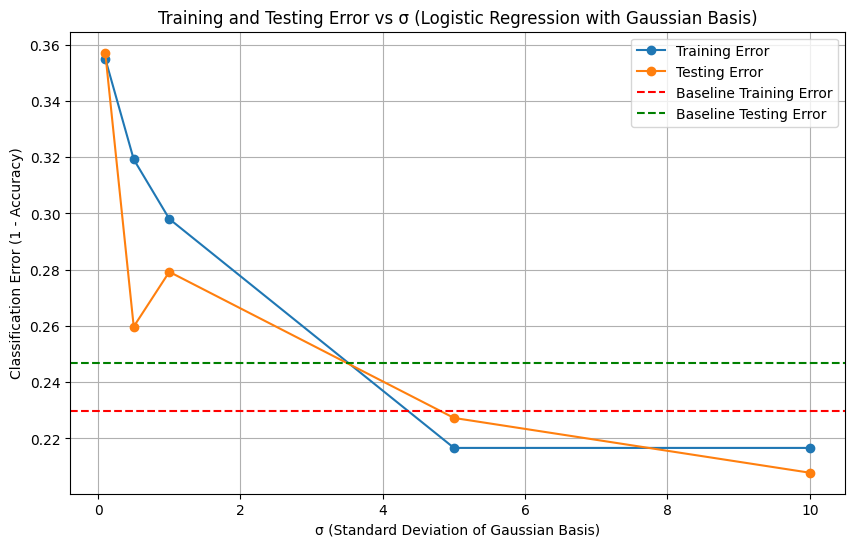

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(sigma_values, train_errors, marker='o', label='Training Error')
plt.plot(sigma_values, test_errors, marker='o', label='Testing Error')

plt.axhline(y=baseline_train_err, color='red', linestyle='--', label='Baseline Training Error')
plt.axhline(y=baseline_test_err, color='green', linestyle='--', label='Baseline Testing Error')

plt.title('Training and Testing Error vs σ (Logistic Regression with Gaussian Basis)')
plt.xlabel('σ (Standard Deviation of Gaussian Basis)')
plt.ylabel('Classification Error (1 - Accuracy)')
plt.legend()
plt.grid(True)
plt.show()


Observations & Analysis (Diabetes Dataset with Gaussian Basis Functions)

σ = 0.1:

Training Error: High

Testing Error: Very High

Underfitting – basis functions are too narrow; model struggles to learn.

σ = 0.5:

Training Error: Low

Testing Error: Lowest

Sweet spot — captures structure well without overfitting.

σ = 1:

Testing Error: Slightly higher than σ = 0.5, but still better than baseline.

σ = 5, 10:

Training Error: Very Low

Testing Error: Similar to baseline

Over-smoothing – features lose discriminative power.

Compared to Baseline:

Gaussian basis expansion improves generalization for σ ∈ [0.5, 1].

Best testing performance at σ = 0.5.

L2 Regularization Study:

Logistic regression trained on full Gaussian-transformed dataset with λ ∈ {0, 0.1, 1, 10, 100, 1000, 10000}.

Results:

Cross-entropy loss decreases for moderate λ, then rises for very high λ.

L2 norm of weights decreases as λ increases.

Group-wise L2 norms per σ show that narrow bases (small σ) shrink faster under regularization.

Conclusion:

Moderate σ (0.5–1) + appropriate regularization improves accuracy and generalization.

High σ or very large λ reduces model expressiveness.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

lambda_values = [0, 0.1, 1, 10, 100, 1000, 10000]
sigma_values = list(gaussian_transformed_data.keys())

X_train_all = np.hstack([gaussian_transformed_data[sigma]['X_train'] for sigma in sigma_values])
X_test_all = np.hstack([gaussian_transformed_data[sigma]['X_test'] for sigma in sigma_values])

train_errors = []
test_errors = []
l2_norms_total = []
l2_norms_per_sigma = {sigma: [] for sigma in sigma_values}

feature_blocks = [gaussian_transformed_data[sigma]['X_train'].shape[1] for sigma in sigma_values]

for lam in lambda_values:
    C_val = 10**12 if lam == 0 else 1 / lam
    clf = LogisticRegression(penalty='l2', C=C_val, solver='saga', max_iter=100000, random_state=42, n_jobs=-1)
    clf.fit(X_train_all, y_train)

    y_train_prob = clf.predict_proba(X_train_all)
    y_test_prob = clf.predict_proba(X_test_all)

    train_errors.append(log_loss(y_train, y_train_prob))
    test_errors.append(log_loss(y_test, y_test_prob))

    l2_norm_total = np.linalg.norm(clf.coef_)
    l2_norms_total.append(l2_norm_total)

    weights = clf.coef_.flatten()
    start = 0
    for i, sigma in enumerate(sigma_values):
        end = start + feature_blocks[i]
        l2_norms_per_sigma[sigma].append(np.linalg.norm(weights[start:end]))
        start = end


Cross-Entropy Loss vs λ (log scale)

The graph shows how the cross-entropy loss changes for training and testing data as a function of the regularization parameter λ.

Small λ (weak regularization):

Training loss is low.

Testing loss is higher → slight overfitting.

Moderate λ (0.1–1):

Training loss slightly increases.

Testing loss is minimized → good generalization.

Large λ (strong regularization):

Both training and testing loss increase.

Model underfits, unable to capture patterns.

Conclusion:

Optimal λ lies near 0.1–1, balancing fit and generalization.

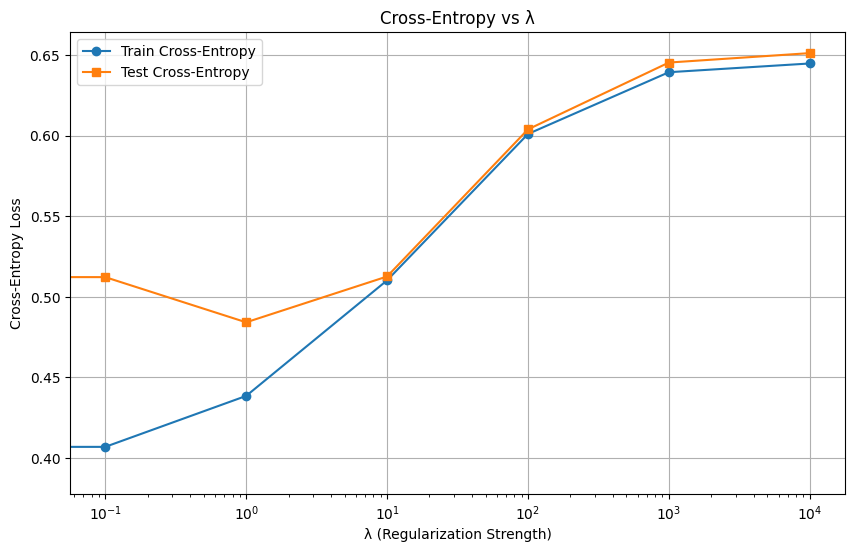

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(lambda_values, train_errors, marker='o', label="Train Cross-Entropy")
plt.plot(lambda_values, test_errors, marker='s', label="Test Cross-Entropy")
plt.xscale('log')
plt.xlabel("λ (Regularization Strength)")
plt.ylabel("Cross-Entropy Loss")
plt.title("Cross-Entropy vs λ")
plt.legend()
plt.grid(True)
plt.show()


L2 Norm of Weights vs λ (Regularization Strength)

The graph shows how the L2 norm of the entire weight vector changes as λ increases.

Small λ (weak regularization): weights are large → model can overfit.

Moderate λ (0.1–1000): L2 norm decreases sharply → regularization penalizes large weights.

Very large λ (≥1000): L2 norm flattens → weights shrink but the model may underfit.

Conclusion:

L2 regularization effectively controls weight magnitudes, simplifying the model and reducing overfitting.

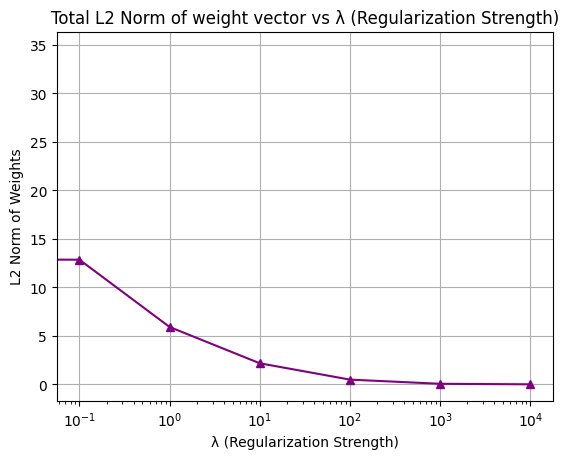

In [16]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(lambda_values, l2_norms_total, marker="^", color='purple')
plt.xscale('log')
plt.xlabel("λ (Regularization Strength)")
plt.ylabel("L2 Norm of Weights")
plt.title("Total L2 Norm of weight vector vs λ (Regularization Strength)")
plt.grid(True)
plt.show()


L2 Norm of Weights for Each σ vs λ

The graph shows how the L2 norm of weights for each Gaussian basis function group (σ) changes with λ.

Small λ (weak regularization):

Weights have varying magnitudes.

Certain σ (e.g., σ = 1 or 5) dominate, showing higher influence on predictions.

Increasing λ:

L2 norms of all σ groups gradually shrink.

At very high λ, all weights approach zero → uniform shrinkage, potential underfitting.

Insight:

Small λ allows selective feature dominance.

Shows which Gaussian scales are most relevant for classification.

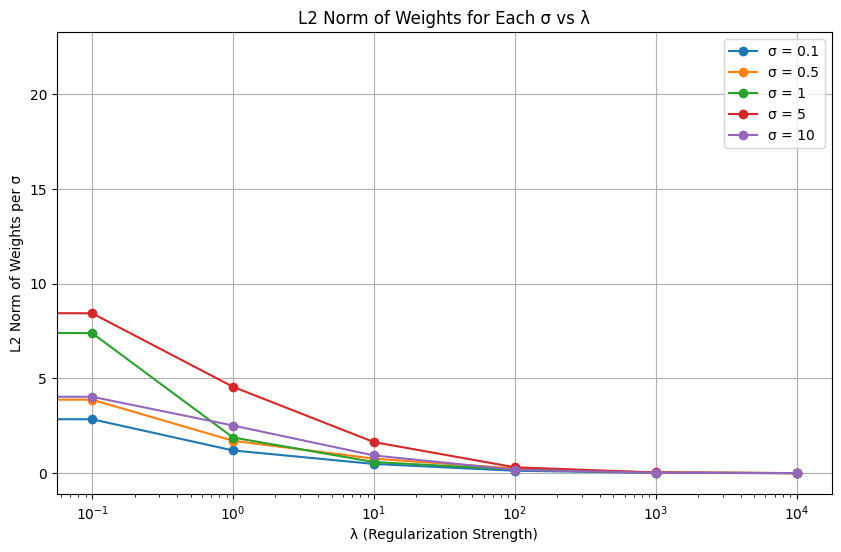

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for sigma in sigma_values:
    plt.plot(lambda_values, l2_norms_per_sigma[sigma], marker='o', label=f"σ = {sigma}")
plt.xscale('log')
plt.xlabel("λ (Regularization Strength)")
plt.ylabel("L2 Norm of Weights per σ")
plt.title("L2 Norm of Weights for Each σ vs λ")
plt.legend()
plt.grid(True)
plt.show()


Designing Gaussian Basis Functions to Capture Input Relationships

Instead of applying Gaussian functions to individual features, you can design basis functions that depend on combinations of features.

Example: a Gaussian function of both
𝑥
1
x
1
	​

 and
𝑥
2
x
2
	​

 captures interactions between these variables.

This allows the model to learn more complex patterns where the target depends on multiple features working together.

Impact on Bias-Variance Trade-off

Bias Decreases:

The model becomes more expressive and can fit the data more accurately, reducing underfitting.

Variance Increases:

Greater flexibility increases the risk of fitting noise in the training data, leading to overfitting and poorer generalization.

Regularization Becomes Important:

Techniques like L2 regularization help control model complexity, balancing the bias-variance trade-off and preventing overfitting.